2. Carga el conjunto de datos Boston a partir del m´odulo sklearn.datasets en Python. Visita el
enlace https://scikit-learn.org/stable/datasets/toy dataset.html#boston-dataset
para conocer m´as sobre este conjunto de datos. Redefine la variable respuesta cuantitativa
MEDV por una variable respuesta binaria Y que le asigne el valor 1 si la tasa de criminalidad
CRIM est´a por encima de la mediana MEDV y 0, en caso contrario. Realiza un an´alisis, an´alogo al
desarrollado en el Ejemplo 3.2, para el modelo de regresi´on log´ıstica que predice Y en funci´on
del resto de variables explicativas

In [2]:
#https://www.kaggle.com/funxexcel/boston-housing-dataset-with-column-names
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

dfcolumns=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']
ruta=r'\Users\Alberto\OneDrive\Documents\Big Data\pirple\boston\housing.csv'
df=pd.read_csv(ruta,delimiter=',')

df['MEDV']=df['MEDV']/1000


In [6]:
median_medv=df['MEDV'].median()
df['Y']=[1 if i>median_medv else 0 for i in df['CRIM']]
df 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0.0240,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0.0216,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0.0347,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0.0334,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0.0362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,0.0224,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,0.0206,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,0.0239,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,0.0220,1


In [7]:
nfil,ncol=df.shape
X=df[df.columns[0:ncol-1]]
y=df['Y']
print('Nº de observaciones',nfil)
print('Nº de predictores', ncol-1)


Nº de observaciones 506
Nº de predictores 14


In [229]:
#estandarizamos matriz de predictores
scaler=preprocessing.StandardScaler().fit(X)
X_scaled=pd.DataFrame(scaler.transform(X),columns=X.columns)
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [230]:
logisticRegr=LogisticRegression()
model=logisticRegr.fit(X_scaled,y)
print('término independiente', model.intercept_)
print('Pendientes', model.coef_)

término independiente [7.51221274]
Pendientes [[ 0.07730756 -1.03880061  1.07115708 -0.00983183  0.14673644 -0.58353118
  -0.55626881 -0.83830241  1.17307821  0.9150725  -0.04683717 -0.16595652
  -0.28269413 -0.0997682 ]]


In [231]:
#medida de rendimiento: tasa de clasificación correcta o accuracy
acc=logisticRegr.score(X_scaled,y)
print('La precisión del modelo es:',acc)


La precisión del modelo es: 0.9782608695652174


In [232]:
predictions = model.predict(X_scaled)
cm = metrics.confusion_matrix(y, predictions)
print(cm)


[[ 10   9]
 [  2 485]]


In [270]:
# Predicci´on dada una nueva observacion
#creamos las nuevas observaciones aleatorias
new_obs=[]
for i in X.columns:
    random.seed(20)
    dfa=df[i]+random.randint(0,1)
    dfa=dfa.iloc[1]
    new_obs.append(dfa)

ynew=np.array(new_obs).reshape(1,-1)
ynew_scaled = pd.DataFrame(scaler.transform(ynew),columns=X.columns)

yhat = model.predict_proba(ynew_scaled)
print('Probabilidades predichas: %s' % yhat[0])

Probabilidades predichas: [0.00966877 0.99033123]


3. La regresion elastic-net combina ambas penalizaciones ridge y lasso. Puede usarse en Python
usando el comando ElasticNet del modulo sklearn.linear model. Resuelve el problema para
10 pares de valores (λridge, λlasso) para el conjunto de datos prostate, y guarda en una matriz
el R2 asociado a cada par. Por ultimo, muestra esta matriz mediante un mapa de calor usando
el comando heatmap del m´odulo seaborn y comenta lo que se observa

In [ ]:
ridgelambdas=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
lassolambdas=

In [8]:
ruta=r'\Users\Alberto\OneDrive\Documents\Big Data\Fundamentos\t16\prostate.txt'
df=pd.read_csv(ruta)
df.head(2)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519


In [9]:
nrow,ncol=df.shape
X = df[df.columns[0:(ncol-1)]]
y = df[df.columns[ncol-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size=0.7,random_state = 1234,shuffle=True)

In [10]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# =============================================================================
#Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(l1_ratio=[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],alphas=np.logspace(-10, 3, 10),normalize=True,cv=5)

modelo= modelo.fit(X = X_train, y = y_train)

In [65]:
alphas=list(modelo.alphas_)
l1_ratios=modelo.l1_ratio
l1_ratios

[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]

In [55]:
mean_error_cv = modelo.mse_path_.mean(axis =2)

df_resultados_cv = pd.DataFrame(
                        data=mean_error_cv.flatten(),
                        index=pd.MultiIndex.from_product(
                        iterables=[modelo.l1_ratio,modelo.alphas_],names=['l1_ratio','modelo.alphas_']),
                        columns = ["mse_cv"])
df_resultados_cv['rmse']=np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = False)
df_resultados_cv


,l1_ratio,modelo.alphas_,mse_cv,rmse
51,0.95,35.938137,1.576257,1.255491
11,0.10,35.938137,1.576257,1.255491
32,0.70,1.291550,1.576257,1.255491
22,0.50,1.291550,1.576257,1.255491
21,0.50,35.938137,1.576257,1.255491
...,...,...,...,...
44,0.90,0.001668,0.744277,0.862715
34,0.70,0.001668,0.737832,0.858971
24,0.50,0.001668,0.734180,0.856843
14,0.10,0.001668,0.731627,0.855352


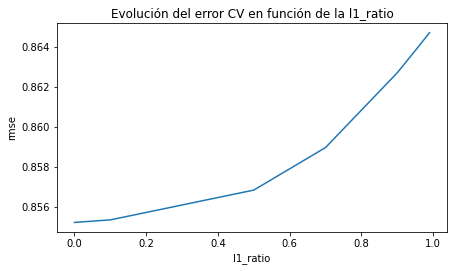

In [67]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse');

Por documentación, la función objetivo minimizada en sklearn ElasticNet es: 
1/(2*n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

Por lo que deducimos que:
Lambda1= alpha * l1_ratio,
lambda_2 == 0.5 * alpha * (1 - l1_ratio)


Véase documentación en la web oficial sklearn: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [59]:
l1ratios=list(np.linspace(0.1,1,10))
#fijamos por documentación el valor de alpha=1
alpha=1


msetest=[]
msetrain=[]
r2_test=[]
r2_train=[]
lambda1=[]
lambda2=[]


for i in l1ratios:
    modelo_elasticNet = ElasticNetCV(l1_ratio=i)
    modelo_elasticNet= modelo_elasticNet.fit(X = X_train, y = y_train)
    pred_train_elasticNet=modelo_elasticNet.predict(X_train)
    pred_test_elasticNet= modelo_elasticNet.predict(X_test)
  

    lambda_1=alpha*i 
    lambda_2=alpha*(1-i)
    mse_train=np.sqrt(mean_squared_error(y_train,pred_train_elasticNet))
    mse_test=np.sqrt(mean_squared_error(y_test,pred_test_elasticNet))
    r2train=r2_score(y_train, pred_train_elasticNet)
    r2test=r2_score(y_test, pred_test_elasticNet)

    lambda1.append(lambda_1)
    lambda2.append(lambda_2)
    msetest.append(mse_test)
    msetrain.append(mse_train)
    r2_train.append(r2train)
    r2_test.append(r2test)
 


   

df_EN=pd.DataFrame(lambda1,columns=['lambda1'])

df_EN['lambda2']=lambda2
df_EN['mse_test']=msetest
df_EN['mse_train']=msetrain
df_EN['R2_test']=r2_test
df_EN['R2_train']=r2_train

In [58]:
df_EN

,lambda1,lambda2,mse_test,mse_train,R2_test,R2_train
0,0.1,0.9,0.673516,0.723512,0.573105,0.632764
1,0.2,0.8,0.655637,0.705521,0.595468,0.650800
2,0.3,0.7,0.654243,0.698591,0.597187,0.657627
3,0.4,0.6,0.657976,0.695804,0.592577,0.660353
4,0.5,0.5,0.660905,0.694192,0.588942,0.661925
5,0.6,0.4,0.661560,0.693816,0.588127,0.662291
6,0.7,0.3,0.660008,0.694417,0.590056,0.661705
7,0.8,0.2,0.659821,0.694472,0.590289,0.661652
8,0.9,0.1,0.659367,0.694673,0.590853,0.661456
9,1.0,0.0,0.659605,0.694761,0.590558,0.661370


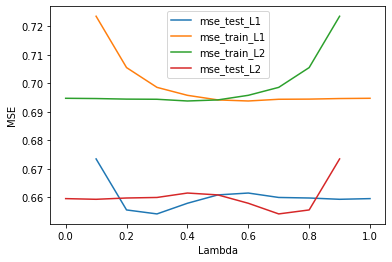

In [54]:
plt.plot(df_EN['lambda1'],df_EN['mse_test'],label='mse_test_L1')
plt.plot(df_EN['lambda1'],df_EN['mse_train'],label='mse_train_L1')
plt.plot(df_EN['lambda2'],df_EN['mse_train'],label='mse_train_L2')
plt.plot(df_EN['lambda2'],df_EN['mse_test'],label='mse_test_L2')
plt.ylabel('MSE')
plt.xlabel('Lambda')
plt.legend()

#para lambda 1 vemos cómo el valor donde el Error mínimo cuadrado alcanza su mínimo en los datos test alrededor del 0.3
#para lambda 2 el valor donde el MSE alcanza su mínimo es en torno al 0.7
#también podemos comprobar esto en la tabla del dataframe, en la fila 2 para el par (l1,l2)=(0.3,0.7)

Text(0.5, 1.0, 'R2 con lambda 1')

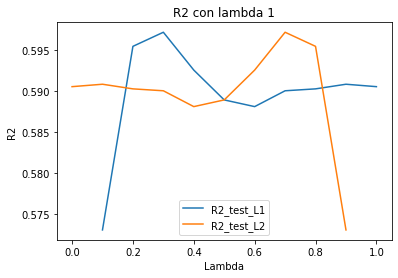

In [53]:
plt.plot(df_EN['lambda1'],df_EN['R2_test'],label='R2_test_L1')
plt.plot(df_EN['lambda2'],df_EN['R2_test'],label='R2_test_L2')
plt.legend()
plt.ylabel('R2')
plt.xlabel('Lambda')
plt.title('R2 con lambda 1')

Text(0.5, 0, 'Lambda')

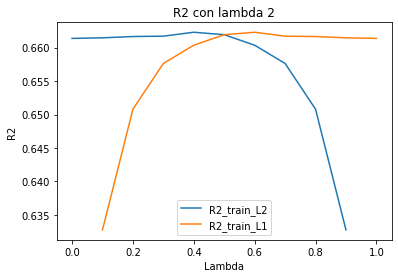

In [49]:
plt.plot(df_EN['lambda2'],df_EN['R2_train'],label='R2_train_L2')
plt.plot(df_EN['lambda1'],df_EN['R2_train'],label='R2_train_L1')
plt.legend()
plt.title('R2 con lambda 2')
plt.ylabel('R2')
plt.xlabel('Lambda')

<AxesSubplot:>

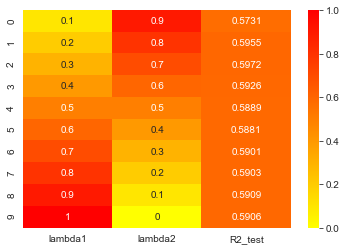

In [95]:
matriz=df_EN[['lambda1','lambda2','R2_test']]
sns.heatmap(data=matriz,cmap='autumn_r',annot=True,fmt='.4g')



(0.58, 0.6)

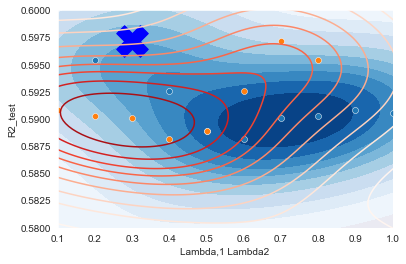

In [174]:
sns.set_style("dark")
yscatter=df_EN.loc[2]['R2_test']
xscatter=df_EN.loc[2]['lambda1']

sns.kdeplot(df_EN['lambda1'],df_EN['R2_test'],shade=True,cmap='Blues',legend=True)
sns.kdeplot(df_EN['lambda2'],df_EN['R2_test'],shade=False,legend=True,cmap='Reds')
sns.scatterplot(df_EN['lambda1'],df_EN['R2_test'])
sns.scatterplot(df_EN['lambda2'],df_EN['R2_test'])
plt.scatter(xscatter,yscatter,marker='X',s=1000,c='blue')

plt.xlabel('Lambda,1 Lambda2')
plt.xlim(0.1,1)
plt.ylim(0.58,0.60)

 Adapta las funciones definidas en Python de los m´etodos de selecci´on del mejor subconjunto,
por pasos hacia delante y por pasos hacia atr´as para que considere un modelo de regresi´on
log´ıstica m´ultiple. Usar como medida de rendimiento la tasa de clasificaci´on correcta. Hacer
una comparativa de los tres m´etodos para el conjunto de datos pima-indians-diabetes.